In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Ranges ##

In [2]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [3]:
make_array(1, 2, 3, 4)

array([1, 2, 3, 4])

In [4]:
np.arange(4)

array([0, 1, 2, 3])

In [5]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [7]:
np.arange(5,25,5)

array([ 5, 10, 15, 20])

In [8]:
np.arange(5,26,5)

array([ 5, 10, 15, 20, 25])

In [10]:
np.arange(5,25,5.0)

array([  5.,  10.,  15.,  20.])

In [11]:
a = np.arange(5,10)

In [12]:
a

array([5, 6, 7, 8, 9])

In [16]:
a.item(5)

IndexError: index 5 is out of bounds for axis 0 with size 5

## Creating a Table from Scratch ##

In [17]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste')

In [18]:
streets

array(['Bancroft', 'Durant', 'Channing', 'Haste'],
      dtype='<U8')

In [19]:
Table()

In [22]:
southside = Table().with_column('Street name', streets)
southside

Street name
Bancroft
Durant
Channing
Haste


In [28]:
southside = southside.with_column('Blocks away from campus', np.arange(4))
southside

Street name,Blocks away from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [29]:
southside.sort('Street name')

Street name,Blocks away from campus
Bancroft,0
Channing,2
Durant,1
Haste,3


In [30]:
southside

Street name,Blocks away from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [31]:
southside.move_to_start('Blocks away from campus')

Blocks away from campus,Street name
0,Bancroft
1,Durant
2,Channing
3,Haste


In [32]:
southside

Blocks away from campus,Street name
0,Bancroft
1,Durant
2,Channing
3,Haste


In [33]:
southside.labels

('Blocks away from campus', 'Street name')

In [34]:
southside.num_columns

2

In [35]:
southside.num_rows

4

In [36]:
Table().with_columns(
    'Street names', streets,
    'Blocks', np.arange(4)
)

Street names,Blocks
Bancroft,0
Durant,1
Channing,2
Haste,3


## Reading a Table from a File  ##

In [38]:
minard = Table.read_table('minard.csv')
minard

Longitude,Latitude,City,Direction,Survivors
24,54.9,Kaunas,Advance,340000
30.2,55.2,Vitebsk,Advance,175000
32,54.8,Smolensk,Advance,145000
37.6,55.8,Moscow,Advance,100000
34.3,55.2,Vyazma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orsha,Retreat,20000
26.8,54.3,Maladyechna,Retreat,12000
24.1,54.4,Kaunas,Retreat,4000


In [39]:
minard.select('Survivors')

Survivors
340000
175000
145000
100000
55000
24000
20000
12000
4000


In [41]:
survivors = minard.column('Survivors')

In [43]:
initial_count = survivors.item(0)
initial_count

340000

In [44]:
survivors / initial_count

array([ 1.        ,  0.51470588,  0.42647059,  0.29411765,  0.16176471,
        0.07058824,  0.05882353,  0.03529412,  0.01176471])

In [45]:
minard = minard.with_column('Percent surviving', survivors / initial_count)

In [46]:
minard

Longitude,Latitude,City,Direction,Survivors,Percent surviving
24,54.9,Kaunas,Advance,340000,1
30.2,55.2,Vitebsk,Advance,175000,0.514706
32,54.8,Smolensk,Advance,145000,0.426471
37.6,55.8,Moscow,Advance,100000,0.294118
34.3,55.2,Vyazma,Retreat,55000,0.161765
32,54.6,Smolensk,Retreat,24000,0.0705882
30.4,54.4,Orsha,Retreat,20000,0.0588235
26.8,54.3,Maladyechna,Retreat,12000,0.0352941
24.1,54.4,Kaunas,Retreat,4000,0.0117647


In [47]:
minard.set_format('Percent surviving', PercentFormatter)

Longitude,Latitude,City,Direction,Survivors,Percent surviving
24,54.9,Kaunas,Advance,340000,100.00%
30.2,55.2,Vitebsk,Advance,175000,51.47%
32,54.8,Smolensk,Advance,145000,42.65%
37.6,55.8,Moscow,Advance,100000,29.41%
34.3,55.2,Vyazma,Retreat,55000,16.18%
32,54.6,Smolensk,Retreat,24000,7.06%
30.4,54.4,Orsha,Retreat,20000,5.88%
26.8,54.3,Maladyechna,Retreat,12000,3.53%
24.1,54.4,Kaunas,Retreat,4000,1.18%


In [48]:
minard

Longitude,Latitude,City,Direction,Survivors,Percent surviving
24,54.9,Kaunas,Advance,340000,100.00%
30.2,55.2,Vitebsk,Advance,175000,51.47%
32,54.8,Smolensk,Advance,145000,42.65%
37.6,55.8,Moscow,Advance,100000,29.41%
34.3,55.2,Vyazma,Retreat,55000,16.18%
32,54.6,Smolensk,Retreat,24000,7.06%
30.4,54.4,Orsha,Retreat,20000,5.88%
26.8,54.3,Maladyechna,Retreat,12000,3.53%
24.1,54.4,Kaunas,Retreat,4000,1.18%


In [49]:
minard.column('Percent surviving')

array([ 1.        ,  0.51470588,  0.42647059,  0.29411765,  0.16176471,
        0.07058824,  0.05882353,  0.03529412,  0.01176471])

## Selecting data in a column ##

In [50]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')

In [52]:
movies.show(3)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire


In [54]:
attendance = movies.column('Total Gross') * (10 ** 6) / movies.column('Average Ticket Price')

In [56]:
movies = movies.with_column('Estimated Attendance', attendance)

In [57]:
movies.show(4)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Attendance
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09
2012,7.96,10837.4,667,The Avengers,1.36148e+09


In [58]:
movies.set_format('Estimated Attendance', NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Attendance
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


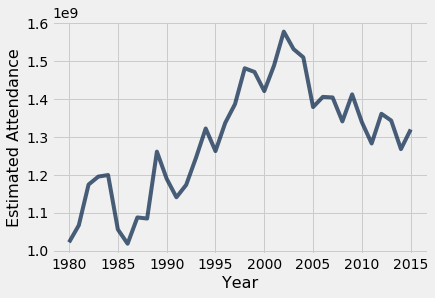

In [60]:
movies.plot('Year', 'Estimated Attendance')

In [62]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Attendance
2004,6.21,9380.5,551,Shrek 2,"1,510,547,504.03"
2003,6.03,9239.7,506,Return of the King,"1,532,288,557.21"
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
2000,5.39,7661,478,The Grinch,"1,421,335,807.05"


In [63]:
movies.where('Year', are.equal_to(2002))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Attendance
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"


In [64]:
movies.where('Year', 2002)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Attendance
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"


In [71]:
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Attendance
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


In [72]:
movies.take(np.arange(2, 5))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Attendance
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"


In [73]:
movies.where('#1 Movie', are.containing('Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Attendance
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
